# Plot collicular Gad2 neuron responses to 12 visual stimuli

### Packages

In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

### Figure and plot settings

In [2]:
# set figure style
plt.style.use("seaborn-poster")

# set font, tick size and background color
plt.rcParams.update({'font.family':'arial'})
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = .5
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.major.width'] = .5
plt.rcParams['figure.facecolor'] = 'w'

colors = np.array([[38, 55, 127], [197, 78, 83], [97, 97, 97]])/255 # Gad2LGN; Gad2PBG; CTR
boxplot_settings = dict(showcaps=False, showfliers=False, medianprops={"lw": 3}, boxprops={"lw":0}, whiskerprops={"lw": 0})

### Set up paths and load data

In [4]:
# data paths, base_path directs to the location of the repository

#########  needs changing  #########
base_path = "D:\\Data\\Repository"
####################################

data_path = os.path.join(base_path, "Recreate Figures", "Submission_data", "Figure 3")
save_path = data_path

# load visual peak responsesto 16 stimuli
peakResponses_LGN = pd.read_csv(os.path.join(data_path, "Gad2-LGN peak responses.csv"))
peakResponses_PBG = pd.read_csv(os.path.join(data_path, "Gad2-PBG peak responses.csv"))

### Plot panel E

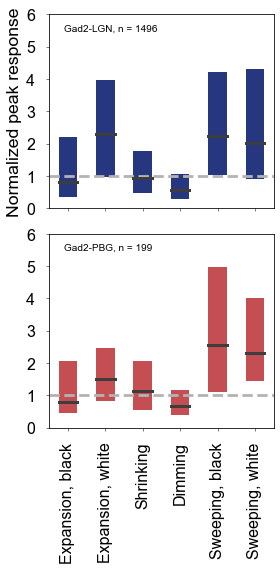

In [6]:
### plot boxplots of peak responses ###
# select 6 simuli
column_names = ["EXPA", "EXPB", "SHRK", "DIMM", "SWEP 2 deg, 30 deg/s", "SWEB 2 deg, 30 deg/s"]
n_stimuli = len(column_names)
borders, plotRange, groupTicks = [3.5, 6.5, 9.5, 12.5], [-.5, n_stimuli-.5], [1.5, 5, 8, 11, 14]

plt.figure(figsize=(4, 8))

plt.subplot(2, 1, 1)
boxplot_settings['boxprops']['facecolor'] = colors[0, :]
normFactor = np.nanpercentile(np.array(peakResponses_LGN[column_names]), 50)

sns.boxplot(data=peakResponses_LGN[column_names]/normFactor, width=.5, **boxplot_settings)
plt.plot(plotRange, [1, 1], '--', color=[.7, .7, .7])
plt.axis([-.5, len(column_names)-.5, 0, 6])
plt.xticks(np.arange(n_stimuli), "")
plt.ylabel('Normalized peak response')
plt.annotate('Gad2-LGN, n = 1496', (-.1, 5.5))

plt.subplot(2, 1, 2)
boxplot_settings['boxprops']['facecolor'] = colors[1, :]
normFactor = np.nanpercentile(np.array(peakResponses_PBG[column_names]), 50)

sns.boxplot(data=peakResponses_PBG[column_names]/normFactor, width=.5, **boxplot_settings)
plt.plot(plotRange, [1, 1], '--', color=[.7, .7, .7])
plt.axis([-.5, len(column_names)-.5, 0, 6])
plt.xticks(np.arange(n_stimuli), ["Expansion, black", "Expansion, white", "Shrinking", "Dimming", "Sweeping, black", "Sweeping, white"], rotation=90)
plt.annotate('Gad2-PBG, n = 199', (-.1, 5.5))

plt.tight_layout()
plt.savefig(os.path.join(save_path, 'Figure3-E_raw.tif'), dpi = 300, bbox_inches = 'tight')